<a href="https://colab.research.google.com/github/Nyakatodianah/Nyakatodianah/blob/main/Nyakato_Dianah_Data_Visualization_Belt_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loading the Data**

In [ ]:
!pip install "pandas<2.0.0"

In [ ]:
!pip install joblib


In [ ]:
import joblib

In [ ]:
#add a new folder to week 13
import os
os.makedirs('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models',exist_ok=True)

In [ ]:
# Confirm creation of new folder
os.listdir('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models')

['Autompg.joblib', 'Autompg']

In [ ]:
# Add Autompg subfolder to Models
os.makedirs('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models/Autompg',exist_ok=True)
# Confirm creation of new folder
os.listdir('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models/Autompg')

[]

In [ ]:
path = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/saved_model.joblib'
df = joblib.load(path)
df

{'preprocessor': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7deee8eda410>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(fill_value='MISSING',
                                                                 strategy='constant')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(drop='if_binary',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7deee8ed9600>)],
                   verbose_feat

In [ ]:
#Assign each of the keys from the dictionary as a separate variable.
print("Keys in the Dictionary:",df.keys())

Keys in the Dictionary: dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])


In [ ]:
# Loading data and objects as separate variables
X_train = df['X_train']
y_train = df['y_train']
X_test = df['X_test']
y_test = df['y_test']
preprocessor = df['preprocessor']
LinearRegression = df['LinearRegression']
RandomForestRegressor = df['RandomForestRegressor']

## saving variables.
import joblib
## creating a dictionary of all of the variables
variable_comb = {'X_train':X_train,
         'y_train': y_train,
         'X_test':X_test,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForestRegressor':RandomForestRegressor}
variable_comb

{'X_train':       Lot Area  Lot Frontage  Overall Cond  Total Bsmt SF Central Air  \
 853      16269           NaN             5         907.00           Y   
 1055     13891        107.00             5       1,710.00           Y   
 2483      8900           NaN             4       1,056.00           Y   
 2351     11475         85.00             6         713.00           Y   
 1700     13654        118.00             5       1,704.00           Y   
 ...        ...           ...           ...            ...         ...   
 1425     11778         91.00             5       2,271.00           Y   
 1833     10678         85.00             5       1,683.00           Y   
 2847     10890         60.00             5       1,058.00           Y   
 124       8800         80.00             7         936.00           Y   
 2586      7700         55.00             7         301.00           Y   
 
       Gr Liv Area  TotRms AbvGrd Street  
 853           907              5   Pave  
 1055        

In [ ]:
# saving the export dict as a joblib file--saving to new Models/Autompg folder
joblib.dump(variable_comb, '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models/Autompg.joblib')

['/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week13/Models/Autompg.joblib']

In [ ]:
#confirm file has been saved
loaded = joblib.load('/content/drive/MyDrive/CodingDojo/02-MachineLearning/saved_model.joblib')
loaded.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

In [ ]:
#Use the preprocessor to transform the X_train/X_test data into processed dataframes.
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed
X_test_processed

array([[1.3860e+04, 7.5000e+01, 7.0000e+00, ..., 9.0000e+00, 1.0000e+00,
        1.0000e+00],
       [8.4050e+03, 5.0000e+01, 8.0000e+00, ..., 7.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.1310e+04, 7.5000e+01, 5.0000e+00, ..., 5.0000e+00, 1.0000e+00,
        1.0000e+00],
       ...,
       [4.7007e+04, 1.2300e+02, 7.0000e+00, ..., 1.1000e+01, 1.0000e+00,
        1.0000e+00],
       [1.0800e+04, 6.0000e+01, 7.0000e+00, ..., 7.0000e+00, 1.0000e+00,
        1.0000e+00],
       [5.1900e+03, 5.0000e+01, 5.0000e+00, ..., 5.0000e+00, 1.0000e+00,
        1.0000e+00]])

In [ ]:
#Replace the column names with the correct feature names extracted from the preprocessor.
X_train.columns = preprocessor.get_feature_names_out()
X_test.columns = preprocessor.get_feature_names_out()
X_train
X_test

,Lot Area,Lot Frontage,Overall Cond,Total Bsmt SF,Gr Liv Area,TotRms AbvGrd,Central Air_Y,Street_Pave
343,13860,75.00,7,"1,952.00",Y,2704,9,Pave
1413,8405,50.00,8,861.00,Y,1367,7,Pave
2583,11310,75.00,5,"1,367.00",Y,1375,5,Pave
2020,6180,60.00,5,960.00,N,986,5,Pave
348,8530,NaN,5,384.00,Y,1474,7,Pave
...,...,...,...,...,...,...,...,...
2223,25485,NaN,4,"1,560.00",Y,1560,6,Pave
1922,11988,90.00,6,"1,244.00",Y,1244,6,Pave
1497,47007,123.00,7,0.00,Y,3820,11,Pave
656,10800,60.00,7,676.00,Y,1352,7,Pave


## **Explain the Linear Regression Model**

In [ ]:
#Extract the coefficients and save them as a Series with the correct feature names as the index.
LinearRegression.coef_

array([ 1.10428754e-01,  8.79663271e+01,  1.41612957e+01,  6.07389601e+01,
        1.03864442e+02, -7.38974003e+03,  3.42004104e+04, -3.04921243e+04])

In [ ]:
import pandas as pd
coefficients = [1.10428754e-01, 8.79663271e+01, 1.41612957e+01, 6.07389601e+01, 1.03864442e+02, -7.38974003e+03, 3.42004104e+04, -3.04921243e+04]

# Create a Series with coefficients
coefficients_series = pd.Series(coefficients)

# Print or use the coefficients Series
print(coefficients_series)


0         0.11
1        87.97
2        14.16
3        60.74
4       103.86
5    -7,389.74
6    34,200.41
7   -30,492.12
dtype: float64


In [ ]:
#Change the pandas option for float format to display the coefficients with pandas in a readable comma separator for thousands and 2 decimal places.
pd.options.display.float_format = '{:,.2f}'.format
coefficients_series

0         0.11
1        87.97
2        14.16
3        60.74
4       103.86
5    -7,389.74
6    34,200.41
7   -30,492.12
dtype: float64

<Axes: >

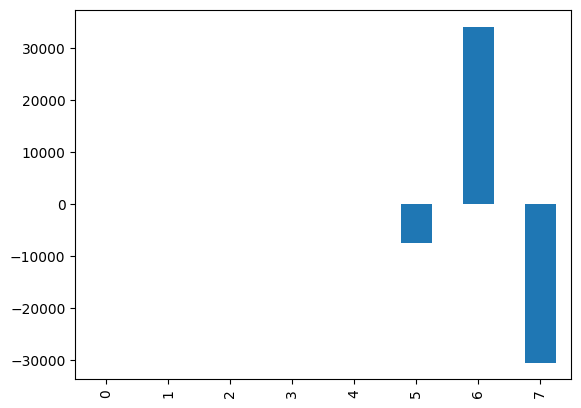

In [ ]:
#Create a bar graph of the coefficients, sorted from largest to smallest. Note: bars may not be visible for coefficients with very small magnitudes
import matplotlib.pyplot as plt
coefficients_series.plot(kind='bar')

In [ ]:
#Provide a quantitative interpretation (both magnitude and directionality) of the four largest positive coefficients explaining how that feature impacts the target.
q1 = coefficients_series.nlargest(4)
q1

6   34,200.41
4      103.86
1       87.97
3       60.74
dtype: float64

In [ ]:
#Provide a quantitative interpretation (both magnitude and directionality)  of the two largest negative coefficients explaining how that feature impacts the target
q2 = coefficients_series.nsmallest(2)
q2

7   -30,492.12
5    -7,389.74
dtype: float64

# **Explain the Random Forest Model:**

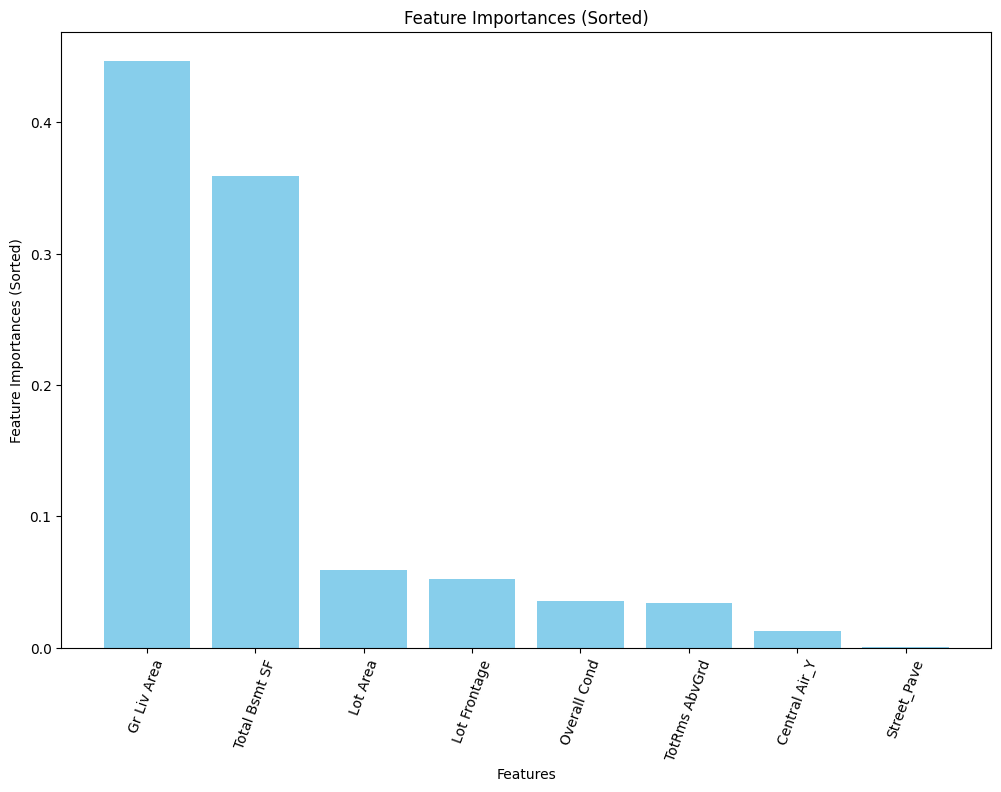

In [ ]:
#Extract and create a bar graph of the feature importances, sorted from largest to smallest.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

sorted_feature_importances = RandomForestRegressor.feature_importances_
sorted_feature_names = X_train.columns

# Sort the feature importances and feature names together
sorted_indices = np.argsort(sorted_feature_importances)[::-1]
sorted_feature_importances = sorted_feature_importances[sorted_indices]
sorted_feature_names = sorted_feature_names[sorted_indices]

#sort the coefficeints by magnitude
sorted_feature_importances = np.abs(sorted_feature_importances)
# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Features')
# Changed the ylabel variable name to avoid conflict
plt.ylabel('Feature Importances (Sorted)')
plt.title('Feature Importances (Sorted)')
plt.xticks(rotation=70)
plt.show()



In [ ]:
#What are the top 4 most important features?
top_4_features = sorted_feature_names[:4]
top_4_features

Index(['Gr Liv Area', 'Total Bsmt SF', 'Lot Area', 'Lot Frontage'], dtype='object')

In [ ]:
#Of the top 4 most important features, identify which of these features also appeared in the 4 largest positive or 2 largest negative coefficients.
four_largest = coefficients_series.nlargest(4)
four_largest


6   34,200.41
4      103.86
1       87.97
3       60.74
dtype: float64

In [ ]:
#Apply Shap to Explain the Random Forest Model
#installing shap
!pip install shap
import shap


In [ ]:
#Apply Shap to Explain the Random Forest Model
shap_values = shap.TreeExplainer(RandomForestRegressor).shap_values(X_train_processed)
shap_values

array([[ 5.78345776e+03,  9.74391789e+02,  1.97750764e+02, ...,
         1.18909580e+03,  1.71630555e+03,  1.20059452e+02],
       [ 8.10396016e+03,  1.71905434e+04,  3.18441259e+03, ...,
         1.07394305e+04,  1.38132902e+03,  1.81434681e+01],
       [-2.39606667e+03,  1.17828136e+01, -2.30306153e+04, ...,
        -1.71282164e+02,  1.89559729e+03,  3.77254410e+01],
       ...,
       [-2.53328104e+03, -8.59174751e+03,  1.56986508e+03, ...,
         7.46540789e+02,  1.42280489e+03,  1.94301039e+01],
       [-1.61177112e+03,  1.25997349e+03,  6.80557709e+02, ...,
         8.63799268e+02,  1.75197910e+03,  6.79061972e+01],
       [-1.14226838e+03, -1.36346517e+03,  1.65453146e+03, ...,
         9.64277083e+02,  2.08409374e+03,  1.30955576e+02]])

In [ ]:
#Sample 500 rows of the processed X_train data as X_shap, using random_state=321
X_shap = X_train_processed[:500]
X_shap

array([[1.62690000e+04, 6.92306849e+01, 5.00000000e+00, ...,
        5.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.38910000e+04, 1.07000000e+02, 5.00000000e+00, ...,
        6.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.90000000e+03, 6.92306849e+01, 4.00000000e+00, ...,
        5.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.46010000e+04, 8.50000000e+01, 5.00000000e+00, ...,
        8.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.58100000e+04, 5.90000000e+01, 5.00000000e+00, ...,
        7.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.50000000e+03, 6.30000000e+01, 5.00000000e+00, ...,
        6.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
#Save the corresponding y_train values as y_shap
y_shap = y_train[:500]
y_shap

853     140000
1055    372402
2483    107000
2351    179900
1700    418000
         ...  
2137    134900
1588    209200
967     315000
1727    181755
534     152000
Name: SalePrice, Length: 500, dtype: int64

In [ ]:
#Create a shap model explainer for the random forest model
shap_explainer = shap.TreeExplainer(RandomForestRegressor)
shap_values = shap_explainer.shap_values(X_shap)
shap_values

array([[ 5.78345776e+03,  9.74391789e+02,  1.97750764e+02, ...,
         1.18909580e+03,  1.71630555e+03,  1.20059452e+02],
       [ 8.10396016e+03,  1.71905434e+04,  3.18441259e+03, ...,
         1.07394305e+04,  1.38132902e+03,  1.81434681e+01],
       [-2.39606667e+03,  1.17828136e+01, -2.30306153e+04, ...,
        -1.71282164e+02,  1.89559729e+03,  3.77254410e+01],
       ...,
       [ 1.32021730e+04,  3.19404871e+03,  3.90404029e+03, ...,
        -2.34065312e+03,  1.56775049e+03,  1.82525488e+01],
       [ 8.01264523e+03, -1.65601039e+03,  4.80796101e+03, ...,
         1.16500946e+02,  1.99195931e+03,  5.01981063e+01],
       [-1.24667459e+03,  4.57401356e+02,  1.91706988e+03, ...,
         6.84586429e+02,  1.80481749e+03,  2.88628720e+01]])

In [ ]:
#Calculate the shap values for the sampled data
shap_values = shap_explainer.shap_values(X_shap)
shap_values

array([[ 5.78345776e+03,  9.74391789e+02,  1.97750764e+02, ...,
         1.18909580e+03,  1.71630555e+03,  1.20059452e+02],
       [ 8.10396016e+03,  1.71905434e+04,  3.18441259e+03, ...,
         1.07394305e+04,  1.38132902e+03,  1.81434681e+01],
       [-2.39606667e+03,  1.17828136e+01, -2.30306153e+04, ...,
        -1.71282164e+02,  1.89559729e+03,  3.77254410e+01],
       ...,
       [ 1.32021730e+04,  3.19404871e+03,  3.90404029e+03, ...,
        -2.34065312e+03,  1.56775049e+03,  1.82525488e+01],
       [ 8.01264523e+03, -1.65601039e+03,  4.80796101e+03, ...,
         1.16500946e+02,  1.99195931e+03,  5.01981063e+01],
       [-1.24667459e+03,  4.57401356e+02,  1.91706988e+03, ...,
         6.84586429e+02,  1.80481749e+03,  2.88628720e+01]])

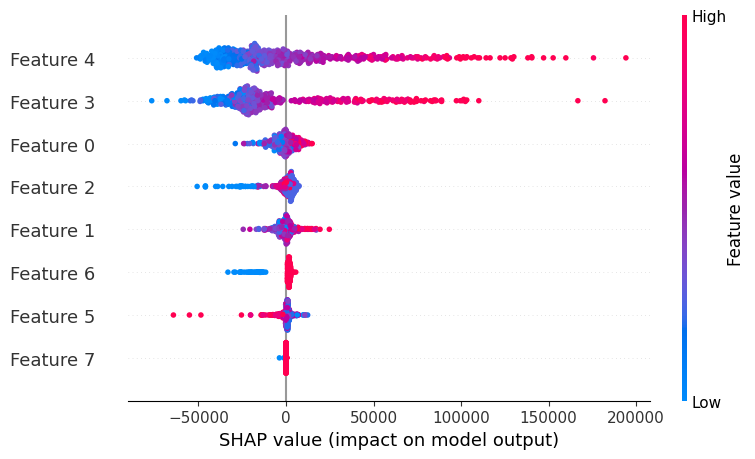

In [ ]:
#Create a summary plot (plot_type=’dot’) of the most important features, according to shap.
shap.summary_plot(shap_values, X_shap, plot_type='dot')


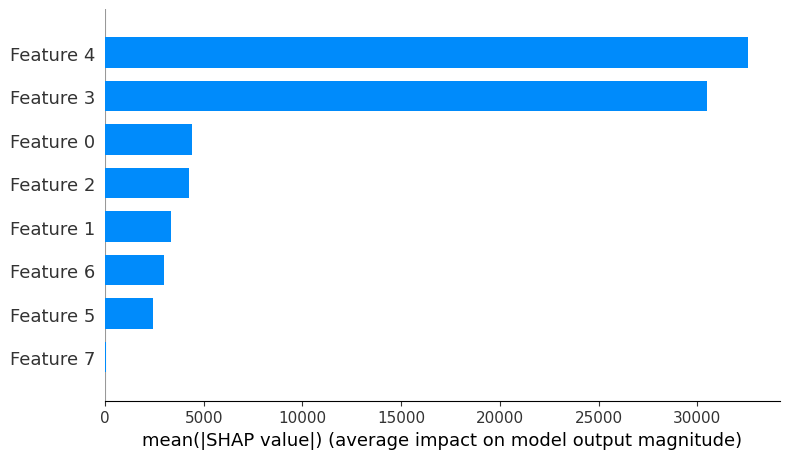

In [ ]:
#Interpret the top 6 most important features. According to shap, what effect does each feature have on the model’s prediction?
six_most_important = shap.summary_plot(shap_values, X_shap, plot_type='bar')
six_most_important


# **PART 2**

In [ ]:
#Load the provided csv, located in the zip file you downloaded in Part 1.
path = '/content/zillow data.csv'
zillow_data = pd.read_csv(path)
zillow_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"107,261.00",...,"261,945.00","267,644.00","273,946.00","280,066.00","285,121.00","288,532.00","290,458.00","291,103.00","292,081.00","292,948.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"222,569.00",...,"453,150.00","464,727.00","478,369.00","489,712.00","497,173.00","499,429.00","497,572.00","498,113.00","500,187.00","503,109.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00",...,"177,319.00","179,463.00","182,812.00","186,403.00","189,836.00","192,064.00","193,760.00","195,140.00","196,787.00","198,137.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00",...,"570,211.00","572,145.00","573,662.00","576,469.00","578,706.00","580,834.00","581,779.00","584,566.00","588,188.00","590,722.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00",...,"752,025.00","757,734.00","760,336.00","766,163.00","771,443.00","776,607.00","779,281.00","782,367.00","788,211.00","793,924.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21205,74039,21934,36768,zip,AL,AL,NaN,NaN,Wilcox County,NaN,...,"90,249.00","90,596.00","90,936.00","91,010.00","90,619.00","90,348.00","89,680.00","90,149.00","89,358.00","89,241.00"
21206,65127,21934,17582,zip,PA,PA,Washington Boro,"Lancaster, PA",Lancaster County,NaN,...,"322,656.00","325,898.00","329,389.00","332,130.00","334,382.00","334,925.00","334,196.00","333,734.00","334,633.00","338,109.00"
21207,63700,21934,14740,zip,NY,NY,Gerry,"Jamestown-Dunkirk-Fredonia, NY",Chautauqua County,"50,791.00",...,"151,009.00","152,305.00","155,312.00","158,570.00","162,928.00","164,508.00","165,006.00","164,405.00","163,577.00","162,744.00"
21208,78407,21934,47020,zip,IN,IN,Florence,NaN,Switzerland County,NaN,...,"185,581.00","186,648.00","189,096.00","190,725.00","193,663.00","195,434.00","196,729.00","196,707.00","196,997.00","197,093.00"


In [ ]:
#displaying zillow data columns
zillow_data.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '31012000',
       ...
       '28022022', '31032022', '30042022', '31052022', '30062022', '31072022',
       '31082022', '30092022', '31102022', '30112022'],
      dtype='object', length=284)

In [ ]:
#Prepare the data as a time series DataFrame
new_zillow_data = pd.DataFrame(zillow_data)
new_zillow_data.drop(columns=['RegionID'], inplace=True)
new_zillow_data

,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,29022000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"107,261.00","107,274.00",...,"261,945.00","267,644.00","273,946.00","280,066.00","285,121.00","288,532.00","290,458.00","291,103.00","292,081.00","292,948.00"
1,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"222,569.00","222,885.00",...,"453,150.00","464,727.00","478,369.00","489,712.00","497,173.00","499,429.00","497,572.00","498,113.00","500,187.00","503,109.00"
2,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00","90,009.00",...,"177,319.00","179,463.00","182,812.00","186,403.00","189,836.00","192,064.00","193,760.00","195,140.00","196,787.00","198,137.00"
3,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00","190,588.00",...,"570,211.00","572,145.00","573,662.00","576,469.00","578,706.00","580,834.00","581,779.00","584,566.00","588,188.00","590,722.00"
4,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00","277,855.00",...,"752,025.00","757,734.00","760,336.00","766,163.00","771,443.00","776,607.00","779,281.00","782,367.00","788,211.00","793,924.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21205,21934,36768,zip,AL,AL,NaN,NaN,Wilcox County,NaN,NaN,...,"90,249.00","90,596.00","90,936.00","91,010.00","90,619.00","90,348.00","89,680.00","90,149.00","89,358.00","89,241.00"
21206,21934,17582,zip,PA,PA,Washington Boro,"Lancaster, PA",Lancaster County,NaN,NaN,...,"322,656.00","325,898.00","329,389.00","332,130.00","334,382.00","334,925.00","334,196.00","333,734.00","334,633.00","338,109.00"
21207,21934,14740,zip,NY,NY,Gerry,"Jamestown-Dunkirk-Fredonia, NY",Chautauqua County,"50,791.00","50,931.00",...,"151,009.00","152,305.00","155,312.00","158,570.00","162,928.00","164,508.00","165,006.00","164,405.00","163,577.00","162,744.00"
21208,21934,47020,zip,IN,IN,Florence,NaN,Switzerland County,NaN,NaN,...,"185,581.00","186,648.00","189,096.00","190,725.00","193,663.00","195,434.00","196,729.00","196,707.00","196,997.00","197,093.00"


In [ ]:
#dropping missing values
new_zillow_data.dropna()

,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,29022000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
2,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00","90,009.00",...,"177,319.00","179,463.00","182,812.00","186,403.00","189,836.00","192,064.00","193,760.00","195,140.00","196,787.00","198,137.00"
3,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00","190,588.00",...,"570,211.00","572,145.00","573,662.00","576,469.00","578,706.00","580,834.00","581,779.00","584,566.00","588,188.00","590,722.00"
4,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00","277,855.00",...,"752,025.00","757,734.00","760,336.00","766,163.00","771,443.00","776,607.00","779,281.00","782,367.00","788,211.00","793,924.00"
6,6,60629,zip,IL,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"133,187.00","133,355.00",...,"253,032.00","254,870.00","256,829.00","260,300.00","262,674.00","263,545.00","263,053.00","263,063.00","263,005.00","262,805.00"
7,7,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,"105,991.00","105,935.00",...,"255,563.00","260,781.00","266,527.00","272,002.00","276,365.00","279,253.00","280,902.00","281,596.00","282,745.00","283,920.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,21911,12494,zip,NY,NY,West Shokan,"Kingston, NY",Ulster County,"142,100.00","143,441.00",...,"451,720.00","456,205.00","453,452.00","457,121.00","459,619.00","467,295.00","458,558.00","452,100.00","447,134.00","454,311.00"
21187,21916,20667,zip,MD,MD,Park Hall,"California-Lexington Park, MD",Saint Marys County,"137,188.00","137,392.00",...,"337,175.00","338,850.00","341,432.00","344,652.00","347,910.00","349,820.00","352,556.00","353,465.00","355,795.00","356,388.00"
21196,21924,11964,zip,NY,NY,Shelter Island,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,"328,122.00","321,669.00",...,"1,405,837.00","1,434,639.00","1,463,443.00","1,490,738.00","1,515,805.00","1,528,479.00","1,521,388.00","1,521,943.00","1,521,626.00","1,526,169.00"
21199,21928,83443,zip,ID,ID,Ririe,"Idaho Falls, ID",Bonneville County,"77,502.00","77,373.00",...,"341,213.00","343,406.00","346,635.00","347,684.00","352,139.00","356,818.00","359,108.00","359,377.00","359,029.00","357,380.00"


In [ ]:
# Drop the columns that are not date columns
columns_with_no_date = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']
date_columns = zillow_data.columns.difference(columns_with_no_date)
date_columns

Index(['28022001', '28022002', '28022003', '28022005', '28022006', '28022007',
       '28022009', '28022010', '28022011', '28022013',
       ...
       '31122012', '31122013', '31122014', '31122015', '31122016', '31122017',
       '31122018', '31122019', '31122020', '31122021'],
      dtype='object', length=275)

In [ ]:
#Melt the wide-form data into a long-form time series
# Melt the DataFrame
melted = pd.melt(zillow_data, id_vars=columns_with_no_date, value_vars=date_columns, var_name='date', value_name='Value')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,date,Value
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,28022001,"109,045.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,28022001,"226,052.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,28022001,"87,845.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,28022001,"220,488.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,28022001,"302,885.00"
...,...,...,...,...,...,...,...,...,...,...,...
5832745,74039,21934,36768,zip,AL,AL,NaN,NaN,Wilcox County,31122021,"87,852.00"
5832746,65127,21934,17582,zip,PA,PA,Washington Boro,"Lancaster, PA",Lancaster County,31122021,"316,089.00"
5832747,63700,21934,14740,zip,NY,NY,Gerry,"Jamestown-Dunkirk-Fredonia, NY",Chautauqua County,31122021,"146,750.00"
5832748,78407,21934,47020,zip,IN,IN,Florence,NaN,Switzerland County,31122021,"182,323.00"


In [ ]:
melted.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', 'date', 'Value'],
      dtype='object')

In [ ]:
#The date column should be named “Date”
melted.rename(columns={'date': 'Date'}, inplace=True)
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,Value
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,28022001,"109,045.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,28022001,"226,052.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,28022001,"87,845.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,28022001,"220,488.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,28022001,"302,885.00"
...,...,...,...,...,...,...,...,...,...,...,...
5832745,74039,21934,36768,zip,AL,AL,NaN,NaN,Wilcox County,31122021,"87,852.00"
5832746,65127,21934,17582,zip,PA,PA,Washington Boro,"Lancaster, PA",Lancaster County,31122021,"316,089.00"
5832747,63700,21934,14740,zip,NY,NY,Gerry,"Jamestown-Dunkirk-Fredonia, NY",Chautauqua County,31122021,"146,750.00"
5832748,78407,21934,47020,zip,IN,IN,Florence,NaN,Switzerland County,31122021,"182,323.00"


In [ ]:
# Convert the 'Date' column to a datetime datatype
# Convert the 'Date' column to datetime format
melted['Date'] = pd.to_datetime(melted['Date'], format='%d%m%Y')

# Format the 'Date' column using strftime
melted['Formatted Date'] = melted['Date'].dt.strftime("%m/%d/%Y")
melted['Formatted Date']

0          02/28/2001
1          02/28/2001
2          02/28/2001
3          02/28/2001
4          02/28/2001
              ...    
5832745    12/31/2021
5832746    12/31/2021
5832747    12/31/2021
5832748    12/31/2021
5832749    12/31/2021
Name: Formatted Date, Length: 5832750, dtype: object

In [ ]:
#set Date as the Index
melted = melted.set_index('Date')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Value,Formatted Date
Date,,,,,,,,,,,
2001-02-28,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,045.00",02/28/2001
2001-02-28,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"226,052.00",02/28/2001
2001-02-28,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"87,845.00",02/28/2001
2001-02-28,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"220,488.00",02/28/2001
2001-02-28,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"302,885.00",02/28/2001
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,74039,21934,36768,zip,AL,AL,NaN,NaN,Wilcox County,"87,852.00",12/31/2021
2021-12-31,65127,21934,17582,zip,PA,PA,Washington Boro,"Lancaster, PA",Lancaster County,"316,089.00",12/31/2021
2021-12-31,63700,21934,14740,zip,NY,NY,Gerry,"Jamestown-Dunkirk-Fredonia, NY",Chautauqua County,"146,750.00",12/31/2021


In [ ]:
#The value column should be named “Home Value”
melted.rename(columns={'Value': 'Home Value'}, inplace=True)
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value,Formatted Date
Date,,,,,,,,,,,
2001-02-28,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,045.00",02/28/2001
2001-02-28,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"226,052.00",02/28/2001
2001-02-28,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"87,845.00",02/28/2001
2001-02-28,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"220,488.00",02/28/2001
2001-02-28,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"302,885.00",02/28/2001
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,74039,21934,36768,zip,AL,AL,NaN,NaN,Wilcox County,"87,852.00",12/31/2021
2021-12-31,65127,21934,17582,zip,PA,PA,Washington Boro,"Lancaster, PA",Lancaster County,"316,089.00",12/31/2021
2021-12-31,63700,21934,14740,zip,NY,NY,Gerry,"Jamestown-Dunkirk-Fredonia, NY",Chautauqua County,"146,750.00",12/31/2021


### **Filter the data**

In [ ]:
#Keep data from the following states:  MA, PA, NY, NJ, MD
filtered_data = melted.loc[melted['State'].isin(['MA', 'PA', 'NY', 'NJ', 'MD'])]
filtered_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value,Formatted Date
Date,,,,,,,,,,,
2001-02-28,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"220,488.00",02/28/2001
2001-02-28,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"302,885.00",02/28/2001
2001-02-28,61148,10,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,"183,685.00",02/28/2001
2001-02-28,62046,11,11236,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,"234,900.00",02/28/2001
2001-02-28,62019,14,11208,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,"216,884.00",02/28/2001
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,62311,21924,11964,zip,NY,NY,Shelter Island,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,"1,362,603.00",12/31/2021
2021-12-31,63740,21924,14805,zip,NY,NY,Alpine,NaN,Schuyler County,"186,432.00",12/31/2021
2021-12-31,63249,21928,13694,zip,NY,NY,Waddington,"Ogdensburg-Massena, NY",Saint Lawrence County,"146,220.00",12/31/2021


In [ ]:
#Keep values from the years  2008 - 2018.
filtered_data = melted.loc[melted.index.year.isin(range(2008, 2019))]
filtered_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value,Formatted Date
Date,,,,,,,,,,,
2009-02-28,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"122,737.00",02/28/2009
2009-02-28,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"258,641.00",02/28/2009
2009-02-28,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"124,949.00",02/28/2009
2009-02-28,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"374,473.00",02/28/2009
2009-02-28,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"484,556.00",02/28/2009
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,74039,21934,36768,zip,AL,AL,NaN,NaN,Wilcox County,"71,103.00",12/31/2018
2018-12-31,65127,21934,17582,zip,PA,PA,Washington Boro,"Lancaster, PA",Lancaster County,"240,967.00",12/31/2018
2018-12-31,63700,21934,14740,zip,NY,NY,Gerry,"Jamestown-Dunkirk-Fredonia, NY",Chautauqua County,"99,870.00",12/31/2018


In [ ]:
#Save the processed data as a  .csv file in a “Data” folder inside your private repo, name the csv “Data/data-for-tableau.csv”
# Define the file path with the file name
file_path = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/data/data-for-tableau.csv'

# Save the processed data as a CSV file
filtered_data.to_csv(file_path)

print("Data has been saved successfully.")

In [78]:
#Resample the home values, grouped by states, to a yearly frequency (based on the beginning of the calendar year) using mean as the aggregation function.
yearly_data = melted.resample('Y').mean()
yearly_data

<ipython-input-78-d3709f922fc2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = melted.resample('Y').mean()


,RegionID,SizeRank,RegionName,Home Value
Date,,,,
2000-12-31,"80,628.02","10,751.58","47,909.17","160,797.13"
2001-12-31,"80,628.02","10,751.58","47,909.17","174,694.87"
2002-12-31,"80,628.02","10,751.58","47,909.17","186,936.61"
2003-12-31,"80,628.02","10,751.58","47,909.17","202,129.77"
2004-12-31,"80,628.02","10,751.58","47,909.17","221,729.90"
2005-12-31,"80,628.02","10,751.58","47,909.17","247,638.85"
2006-12-31,"80,628.02","10,751.58","47,909.17","266,025.07"
2007-12-31,"80,628.02","10,751.58","47,909.17","263,590.96"
2008-12-31,"80,628.02","10,751.58","47,909.17","243,794.05"


<Axes: xlabel='Date'>

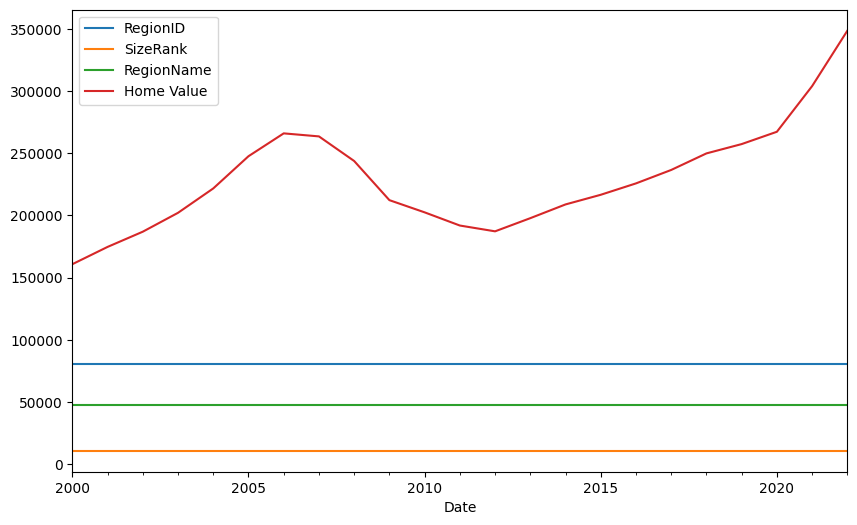

In [79]:
#Plot a line graph with each of the states as a separate line.
yearly_data.plot(figsize=(10, 6))


### **Part 3)Tableau Story Link**

https://public.tableau.com/app/profile/nyakato.dianah/viz/DataVisualisationBeltExam/STORY?publish=yes